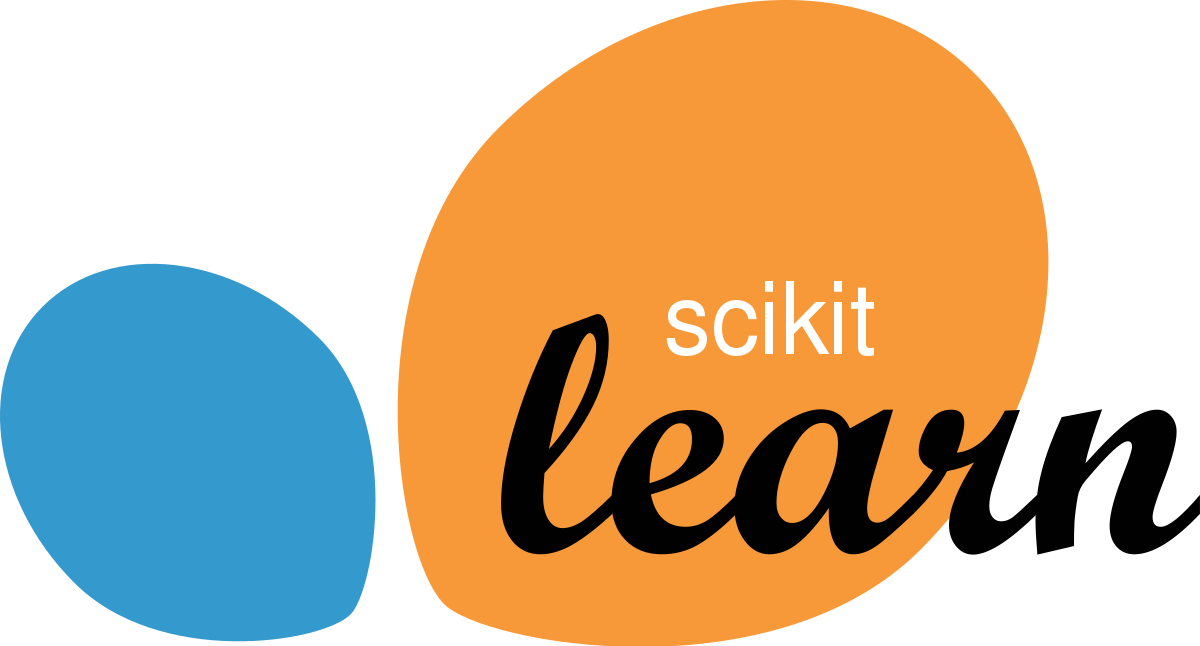

# Klasifikasi dengan KNN (K Nearest Neighbours)

- KNN = salah satu model machine learning yg digunakan untuk memprediksi bedasarkan kemiripan perilaku dengan node/data yang bersebelahan

Source : https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm

## Sumber Materi : 

https://youtu.be/4zARMcgc7hA

## Materi :

### Load Dataset

#### Sample Dataset

In [42]:
import pandas as pd

sensus = {
    'tinggi': [158, 170, 183, 191, 155, 163, 180, 158, 178],
    'berat': [64, 86, 84, 80, 49, 59, 67, 54, 67],
    'jk': [
        'pria', 'pria', 'pria', 'pria', 'wanita', 'wanita', 'wanita', 'wanita',
        'wanita'
    ]
}

sensus_df = pd.DataFrame(sensus)
sensus_df

,tinggi,berat,jk
0,158,64,pria
1,170,86,pria
2,183,84,pria
3,191,80,pria
4,155,49,wanita
5,163,59,wanita
6,180,67,wanita
7,158,54,wanita
8,178,67,wanita


#### Visualisasi Data

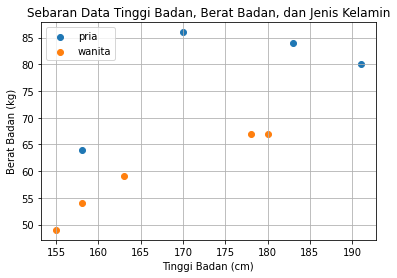

In [43]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
for jk, d in sensus_df.groupby('jk'):
    ax.scatter(d['tinggi'], d['berat'], label=jk)

plt.legend(loc='upper left')
plt.title('Sebaran Data Tinggi Badan, Berat Badan, dan Jenis Kelamin')
plt.xlabel('Tinggi Badan (cm)')
plt.ylabel('Berat Badan (kg)')
plt.grid(True)
plt.show()

### Classification dengan KNN

#### Preprocessing Dataset

In [44]:
import numpy as np

X_train = np.array(sensus_df[['tinggi', 'berat']])
y_train = np.array(sensus_df['jk'])

print(f'X_train:\n{X_train}\n')
print(f'y_train: {y_train}')

X_train:
[[158  64]
 [170  86]
 [183  84]
 [191  80]
 [155  49]
 [163  59]
 [180  67]
 [158  54]
 [178  67]]

y_train: ['pria' 'pria' 'pria' 'pria' 'wanita' 'wanita' 'wanita' 'wanita' 'wanita']


In [45]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
print(f'y_train:\n{y_train}')

y_train:
[[0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]]


In [46]:
y_train = y_train.flatten()
print(f'y_train: {y_train}')

y_train: [0 0 0 0 1 1 1 1 1]


#### Training KNN Classification Model

- Variabel K mengindikasikan jumlah node/tetangga terdekat ynag diikut sertakan

In [47]:
from sklearn.neighbors import KNeighborsClassifier

K = 3
model = KNeighborsClassifier(n_neighbors=K)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

#### Prediksi Jenis Kelamin

In [48]:
tinggi_badan = 155
berat_badan = 70
X_new = np.array([tinggi_badan, berat_badan]).reshape(1, -1)
X_new

array([[155,  70]])

In [49]:
y_new = model.predict(X_new)
y_new

array([1])

In [50]:
lb.inverse_transform(y_new)

array(['wanita'], dtype='<U6')

### Visualisasi Nearest Neighbours

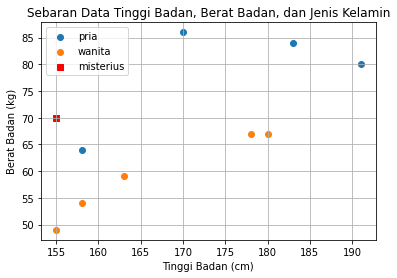

In [51]:
fig, ax = plt.subplots()
for jk, d in sensus_df.groupby('jk'):
    ax.scatter(d['tinggi'], d['berat'], label=jk)

plt.scatter(tinggi_badan,
            berat_badan,
            marker='s',
            color='red',
            label='misterius')

plt.legend(loc='upper left')
plt.title('Sebaran Data Tinggi Badan, Berat Badan, dan Jenis Kelamin')
plt.xlabel('Tinggi Badan (cm)')
plt.ylabel('Berat Badan (kg)')
plt.grid(True)
plt.show()

#### Kalkulasi Distance (Euclidean Distance)

$distance = \sqrt{ (t_1 - t_2)^2 + (b_1 - b_2)^2 }$

Referensi: https://en.wikipedia.org/wiki/Euclidean_distance

- berfungsi untuk menghitung jarak antar data point

In [52]:
misterius = np.array([tinggi_badan, berat_badan])
misterius

array([155,  70])

In [53]:
X_train

array([[158,  64],
       [170,  86],
       [183,  84],
       [191,  80],
       [155,  49],
       [163,  59],
       [180,  67],
       [158,  54],
       [178,  67]], dtype=int64)

In [54]:
from scipy.spatial.distance import euclidean

data_jarak = [euclidean(misterius, d) for d in X_train]
data_jarak

[6.708203932499369,
 21.93171219946131,
 31.304951684997057,
 37.36308338453881,
 21.0,
 13.601470508735444,
 25.179356624028344,
 16.278820596099706,
 23.194827009486403]

In [55]:
sensus_df['jarak'] = data_jarak
sensus_df.sort_values(['jarak'])

,tinggi,berat,jk,jarak
0,158,64,pria,6.708204
5,163,59,wanita,13.601471
7,158,54,wanita,16.278821
4,155,49,wanita,21.000000
1,170,86,pria,21.931712
8,178,67,wanita,23.194827
6,180,67,wanita,25.179357
2,183,84,pria,31.304952
3,191,80,pria,37.363083


### Evaluasi KNN Classification Model

##### Testing Set

In [56]:
X_test = np.array([[168, 65], [180, 96], [160, 52], [169, 67]])
y_test = lb.transform(np.array(['pria', 'pria', 'wanita', 'wanita'])).flatten()

print(f'X_test:\n{X_test}\n')
print(f'y_test:\n{y_test}')

X_test:
[[168  65]
 [180  96]
 [160  52]
 [169  67]]

y_test:
[0 0 1 1]


##### Prediksi terhadap testing set

In [57]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 1, 1])

###### Accuracy

Accuracy is the proportion of test instances that were classified correctly.

$accuracy = \frac{tp\ +\ tn}{tp\ +\ tn\ +\ fp\ +\ fn}$

Source : https://en.wikipedia.org/wiki/Precision_and_recall

- tp = true positive
- tn = true negative
- fp = false positive
- fn = false negative

In [58]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)

print(f'Accuracy: {acc}')

Accuracy: 0.75


###### Precission

Precision is the proportion of test instances that were predicted to be positive that are truly positive. 

$precission = \frac{tp}{tp\ +\ fp}$

Source : https://en.wikipedia.org/wiki/Precision_and_recall

In [59]:
from sklearn.metrics import precision_score

prec = precision_score(y_test, y_pred)

print(f'Precission: {prec}')

Precission: 0.6666666666666666


###### Recall

Recall is the proportion of truly positive test instances that were predicted to be positive.

$recall = \frac{tp}{tp\ + \ fn}$

Source : https://en.wikipedia.org/wiki/Precision_and_recall

In [60]:
from sklearn.metrics import recall_score

rec = recall_score(y_test, y_pred)

print(f'Recall: {rec}')

Recall: 1.0


##### F1 Score

The F1 score is the harmonic mean of precision and recall.

$F1 = 2 \times \frac{precission\ \times \ recall}{precission\ + \ recall}$

Source : https://en.wikipedia.org/wiki/Precision_and_recall

In [61]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred)

print(f'F1-score: {f1}')

F1-score: 0.8


##### Classification Report

berfungsi menampilkan evaluation method
- binary 1 = positif
- binary 0 = negatif

In [62]:
from sklearn.metrics import classification_report

cls_report = classification_report(y_test, y_pred)

print(f'Classification Report:\n{cls_report}')

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.67      1.00      0.80         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4



###### Classification Report

#### Matthews Correlation Coefficient (MCC)

- MCC is an alternative to the F1 score for measuring the performance of binary classifiers. 
- A perfect classifier's MCC is 1. 
- A trivial classifier that predicts randomly will score 0, and a perfectly wrong classifier will score -1.

$MCC = \frac{tp\ \times\ tn\ + fp\ \times\ fn}{ \sqrt{ (tp\ +\ fp)\ \times\ (tp\ +\ fn)\ \times\ (tn\ +\ fp)\ \times\ (tn\ +\ fn)  }  }$

Source : https://en.wikipedia.org/wiki/Matthews_correlation_coefficient

In [63]:
from sklearn.metrics import matthews_corrcoef

mcc = matthews_corrcoef(y_test, y_pred)

print(f'MCC: {mcc}')

MCC: 0.5773502691896258
